In [27]:
from PIL import Image, ImageFont, ImageDraw
im = Image.open('./realcap/captcha (4).gif') 
%matplotlib inline

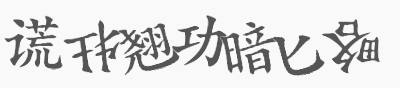

In [28]:
im

In [29]:
from zheye import util

In [30]:
im = util.CenterExtend(im, radius=20)

In [31]:
vec = util.Img2Vec(im).copy()

In [32]:
Y = []
for i in range(vec.shape[0]):
    for j in range(vec.shape[1]):
        if vec[i][j] <= 150:
            Y.append([i, j])

# 高斯混合

In [33]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

In [34]:
import time
start_time = time.time()

ini = np.array([[64, 60 ],[64, 100],[64, 140],[64, 180],[64, 220],[64, 260],[64, 300]])

gmm = mixture.GaussianMixture(n_components=7, covariance_type='tied', reg_covar=1e2, tol=1e3, n_init=9)
gmm.fit(Y)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.5358979702 seconds ---


In [35]:
gmm.means_

array([[  69.95803852,  269.80757743],
       [  68.24571129,  118.17421695],
       [  76.97357505,  316.51748669],
       [  63.80349286,   55.69649357],
       [  62.70598251,  226.72240744],
       [  68.4102538 ,  170.1129511 ],
       [  66.13634206,  370.44365016]])

In [36]:
centers = gmm.means_.copy()

In [37]:
centers = centers[np.argsort(centers[:, 1])]

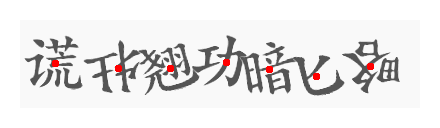

In [38]:
util.PaintPoint(im.convert("RGB"), centers)

In [62]:
import keras
model = keras.models.load_model('zheye/zheyeV5.keras')

In [42]:
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [55]:
index = 2

import time
start_time = time.time()

a = [[0]*3 for i in range(3) ]
for i in range(3):
    for j in range(3):
        x = -2 + i + centers[index][0]
        y = -2 + j + centers[index][1]

        cr = util.crop(im, x, y, radius=20)
        cr = cr.resize((40, 40), Image.ANTIALIAS)

        #X = np.asarray(cr.convert('1'), dtype='float')
        X = np.asarray(cr.convert('L'), dtype='float64')

        X[X <= 150] = -1
        X[X >  150] = 1
        
        x0 = np.expand_dims(X, axis=0)
        x1 = np.expand_dims(x0, axis=3)
        m_y = model.predict(x1)
        
        a[i][j] = m_y[0][0]

print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0470261573792 seconds ---


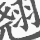

In [56]:
cr

In [57]:
score = np.array(a)

In [60]:
score

array([[ 0.99998808,  0.99989104,  0.99981993],
       [ 0.99998939,  0.99997461,  0.99996877],
       [ 0.99998999,  0.99997258,  0.99973363]], dtype=float32)

In [47]:
score[score > 0.5]

array([], dtype=float32)

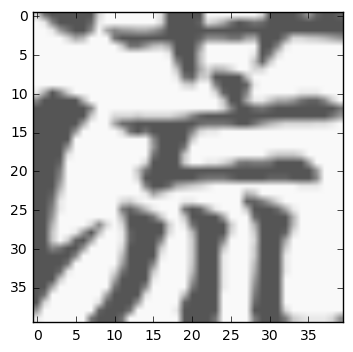

[  1.00000000e+00   5.60739792e-15]


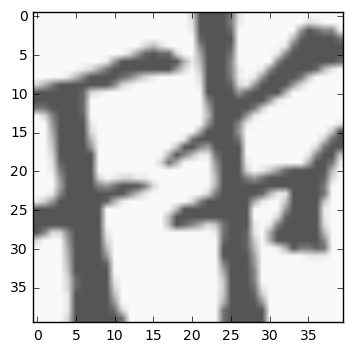

[  2.39499896e-05   9.99976039e-01]


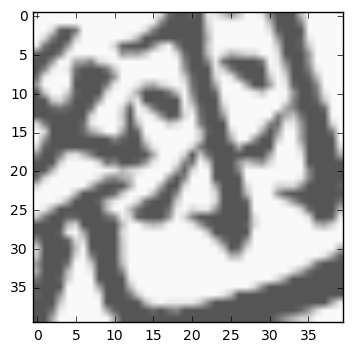

[  9.99733627e-01   2.66377028e-04]


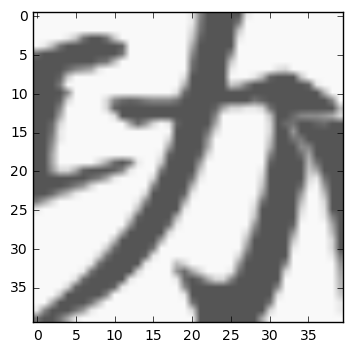

[  1.00000000e+00   5.32569702e-13]


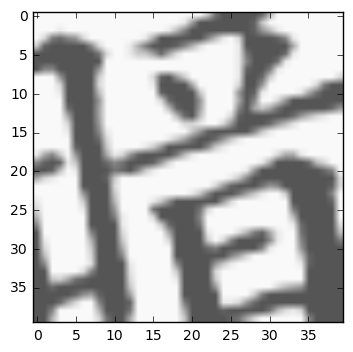

[  1.00000000e+00   1.22333194e-11]


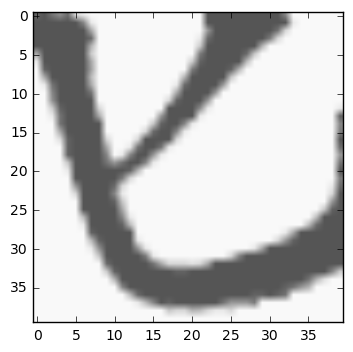

[ 0.99306631  0.00693366]


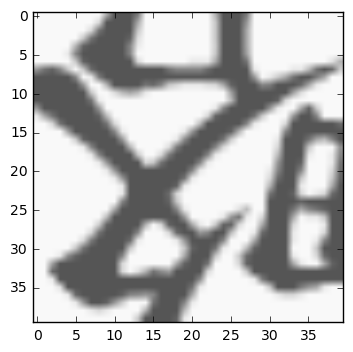

[  1.12814590e-14   1.00000000e+00]


In [48]:
plt.ion()
for i in range(7):
    x = centers[i][0]
    y = centers[i][1]
    
    cr = util.crop(im, x, y, radius=20)
    cr = cr.resize((40, 40), Image.ANTIALIAS)
    
    X = np.asarray(cr.convert('L'), dtype='float64')
    
    mm = Image.fromarray(X)
    plt.imshow(mm, cmap='hot')
    plt.show()
    
    X[X <= 150] = -1
    X[X >  150] = 1

    x0 = np.expand_dims(X, axis=0)
    x1 = np.expand_dims(x0, axis=3)
    m_y = model.predict(x1)
    print(m_y[0])

# 计算召回率

In [68]:
testT_X = np.load('./testT_X.npy')
testT_Y = np.load('./testT_Y.npy')

In [69]:
score = model.evaluate(testT_X, testT_Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.018057209669146687)
('Test accuracy:', 0.99199999999999999)
